# Training dataset overview
- 

# Load training dataset

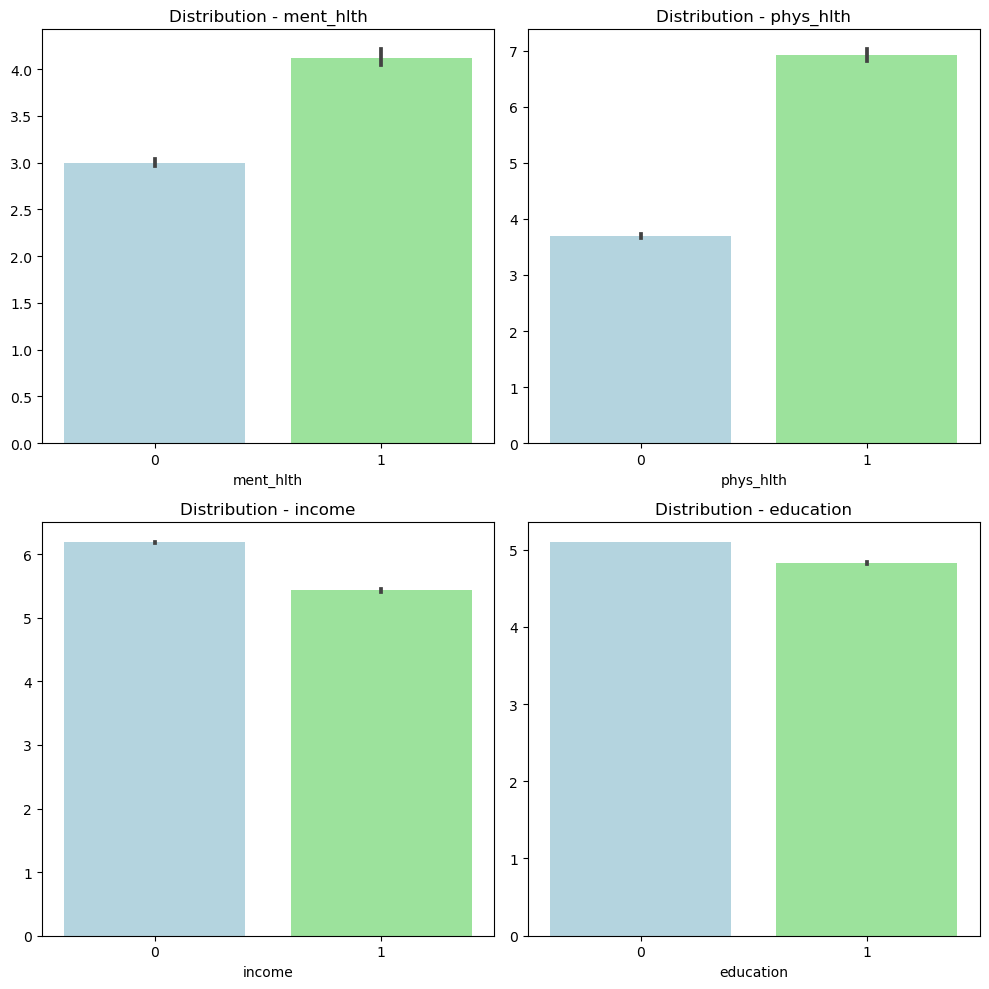

In [13]:
# Create a 2x2 grid for the subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Create a box plot for each numeric column
for i, column in enumerate(discrete_cols):
    no_dio = df.loc[df['status'] == 0, column]
    is_dio = df.loc[df['status'] == 1, column]

    # Create the violin plots for each category
    sns.barplot(
        data=[no_dio, is_dio], ax=axes[i], 
        palette=['lightblue', 'lightgreen']
    )
    axes[i].set_title(f'Distribution - {column}')
    axes[i].set_xlabel(column)

plt.tight_layout()
plt.show()

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df = pd.read_csv('data_train.csv', index_col = False)

In [16]:
df

,Id,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,ExtraMedTest,ExtraAlcoholTest,Status
0,0,0,0,1,24,1,0,0,1,0,...,0,0,0,0,8,4,5,60,0,0
1,1,0,0,1,28,0,0,0,1,1,...,1,0,0,0,2,6,8,0,-64,0
2,2,0,0,1,36,1,0,0,1,1,...,30,30,1,0,3,2,1,-46,0,0
3,3,0,1,1,35,0,0,0,1,1,...,0,0,0,0,8,6,8,-83,-188,0
4,4,0,1,1,27,0,0,0,1,0,...,0,0,0,0,9,5,4,-58,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202939,202939,0,0,1,29,0,0,0,1,0,...,10,2,0,0,8,6,7,-66,4,0
202940,202940,0,0,1,23,0,0,0,1,0,...,0,0,0,0,11,5,7,0,-84,0
202941,202941,1,1,1,38,0,0,0,1,1,...,0,2,0,1,10,6,6,-57,-16,0
202942,202942,0,1,1,22,0,0,0,1,1,...,0,14,0,0,9,6,7,59,0,0


In [17]:
# rename columns from camelCase to snake_case
df.columns = (df.columns
                .str.replace('(?<=[a-z])(?=[A-Z])', '_', regex=True)
                .str.lower()
             )
df.columns

Index(['id', 'high_bp', 'high_chol', 'chol_check', 'bmi', 'smoker', 'stroke',
       'heart_diseaseor_attack', 'phys_activity', 'fruits', 'veggies',
       'hvy_alcohol_consump', 'any_healthcare', 'no_docbc_cost', 'gen_hlth',
       'ment_hlth', 'phys_hlth', 'diff_walk', 'sex', 'age', 'education',
       'income', 'extra_med_test', 'extra_alcohol_test', 'status'],
      dtype='object')

In [18]:
# df = df.loc[:, ~df.columns.isin(['id', 'education', 'income'])]
df = df.loc[:, ~df.columns.isin(['id'])]
df.columns

Index(['high_bp', 'high_chol', 'chol_check', 'bmi', 'smoker', 'stroke',
       'heart_diseaseor_attack', 'phys_activity', 'fruits', 'veggies',
       'hvy_alcohol_consump', 'any_healthcare', 'no_docbc_cost', 'gen_hlth',
       'ment_hlth', 'phys_hlth', 'diff_walk', 'sex', 'age', 'education',
       'income', 'extra_med_test', 'extra_alcohol_test', 'status'],
      dtype='object')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202944 entries, 0 to 202943
Data columns (total 24 columns):
 #   Column                  Non-Null Count   Dtype
---  ------                  --------------   -----
 0   high_bp                 202944 non-null  int64
 1   high_chol               202944 non-null  int64
 2   chol_check              202944 non-null  int64
 3   bmi                     202944 non-null  int64
 4   smoker                  202944 non-null  int64
 5   stroke                  202944 non-null  int64
 6   heart_diseaseor_attack  202944 non-null  int64
 7   phys_activity           202944 non-null  int64
 8   fruits                  202944 non-null  int64
 9   veggies                 202944 non-null  int64
 10  hvy_alcohol_consump     202944 non-null  int64
 11  any_healthcare          202944 non-null  int64
 12  no_docbc_cost           202944 non-null  int64
 13  gen_hlth                202944 non-null  int64
 14  ment_hlth               202944 non-null  int64
 15  

In [20]:
pd.set_option('display.max_columns', None)
df.describe()

,high_bp,high_chol,chol_check,bmi,smoker,stroke,heart_diseaseor_attack,phys_activity,fruits,veggies,hvy_alcohol_consump,any_healthcare,no_docbc_cost,gen_hlth,ment_hlth,phys_hlth,diff_walk,sex,age,education,income,extra_med_test,extra_alcohol_test,status
count,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000
mean,0.428700,0.424344,0.962655,28.379824,0.442634,0.040844,0.094391,0.756302,0.635372,0.811519,0.055912,0.951543,0.083693,2.514024,3.196971,4.256455,0.168707,0.439545,8.037449,5.050245,6.055641,-7.408660,-7.560041,0.175571
std,0.494891,0.494244,0.189607,6.612738,0.496700,0.197929,0.292372,0.429313,0.481327,0.391096,0.229752,0.214730,0.276928,1.070370,7.427247,8.736665,0.374494,0.496333,3.051568,0.985601,2.070140,75.993743,75.927137,0.380455
min,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,-199.000000,-199.000000,0.000000
25%,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000,-55.000000,-55.000000,0.000000
50%,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000,40.000000,40.000000,0.000000
max,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000,199.000000,199.000000,1.000000


No N/A detected within any fields. We are free to go ahead without the null handling

In [19]:
df.isnull().sum()

high_bp                   0
high_chol                 0
chol_check                0
bmi                       0
smoker                    0
stroke                    0
heart_diseaseor_attack    0
phys_activity             0
fruits                    0
veggies                   0
hvy_alcohol_consump       0
any_healthcare            0
no_docbc_cost             0
gen_hlth                  0
ment_hlth                 0
phys_hlth                 0
diff_walk                 0
sex                       0
age                       0
education                 0
income                    0
extra_med_test            0
extra_alcohol_test        0
status                    0
dtype: int64

In [6]:
# categorize features
bool_cols = [
    'high_bp','high_chol','chol_check','smoker','stroke', 'heart_diseaseor_attack',
    'phys_activity','fruits','veggies','hvy_alcohol_consump','any_healthcare','no_docbc_cost',
    'diff_walk', 'sex'
]

discrete_cols = ['ment_hlth', 'phys_hlth', 'income', 'education']

cont_cols =  ['bmi','age','extra_med_test', 'extra_alcohol_test']

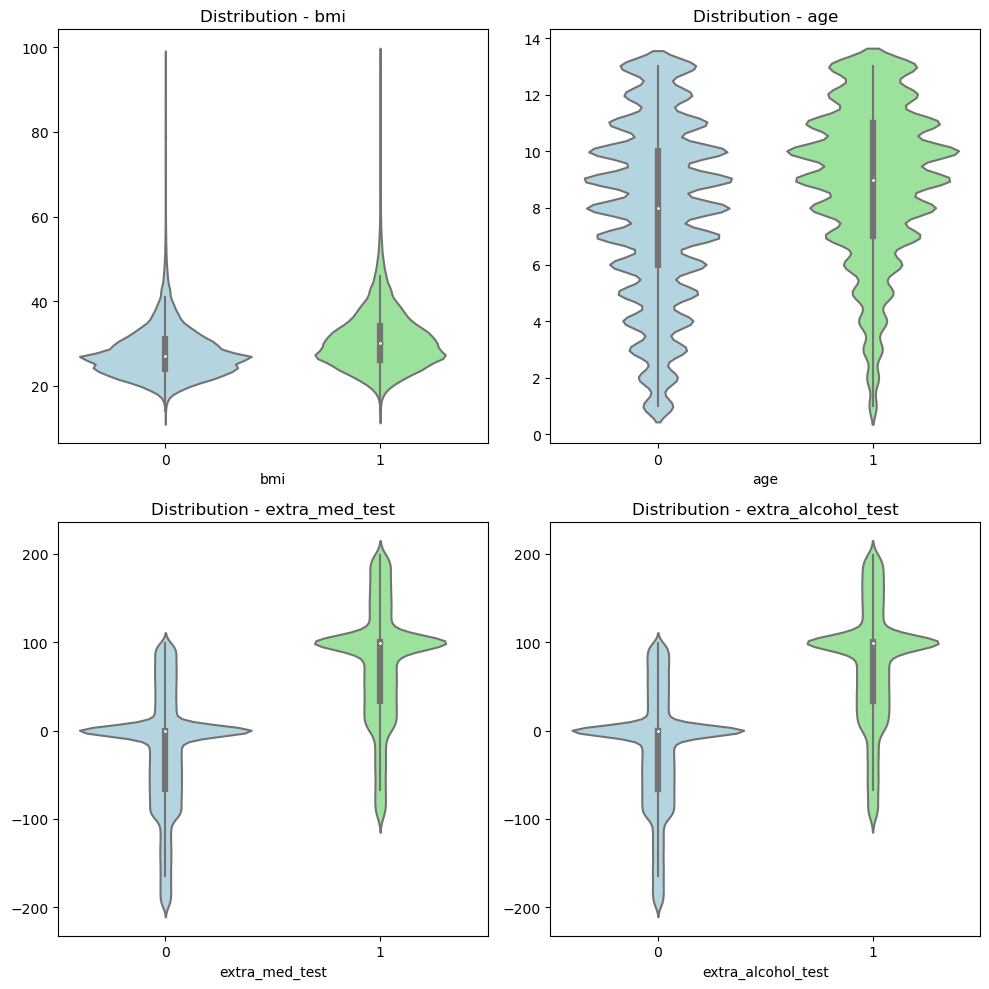

In [7]:
# Create a 2x2 grid for the subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Create a box plot for each numeric column
for i, column in enumerate(cont_cols):
    no_dio = df.loc[df['status'] == 0, column]
    is_dio = df.loc[df['status'] == 1, column]

    # Create the violin plots for each category
    sns.violinplot(
        data=[no_dio, is_dio], ax=axes[i], 
        palette=['lightblue', 'lightgreen'],
    )
    axes[i].set_title(f'Distribution - {column}')
    axes[i].set_xlabel(column)

plt.tight_layout()
plt.show()


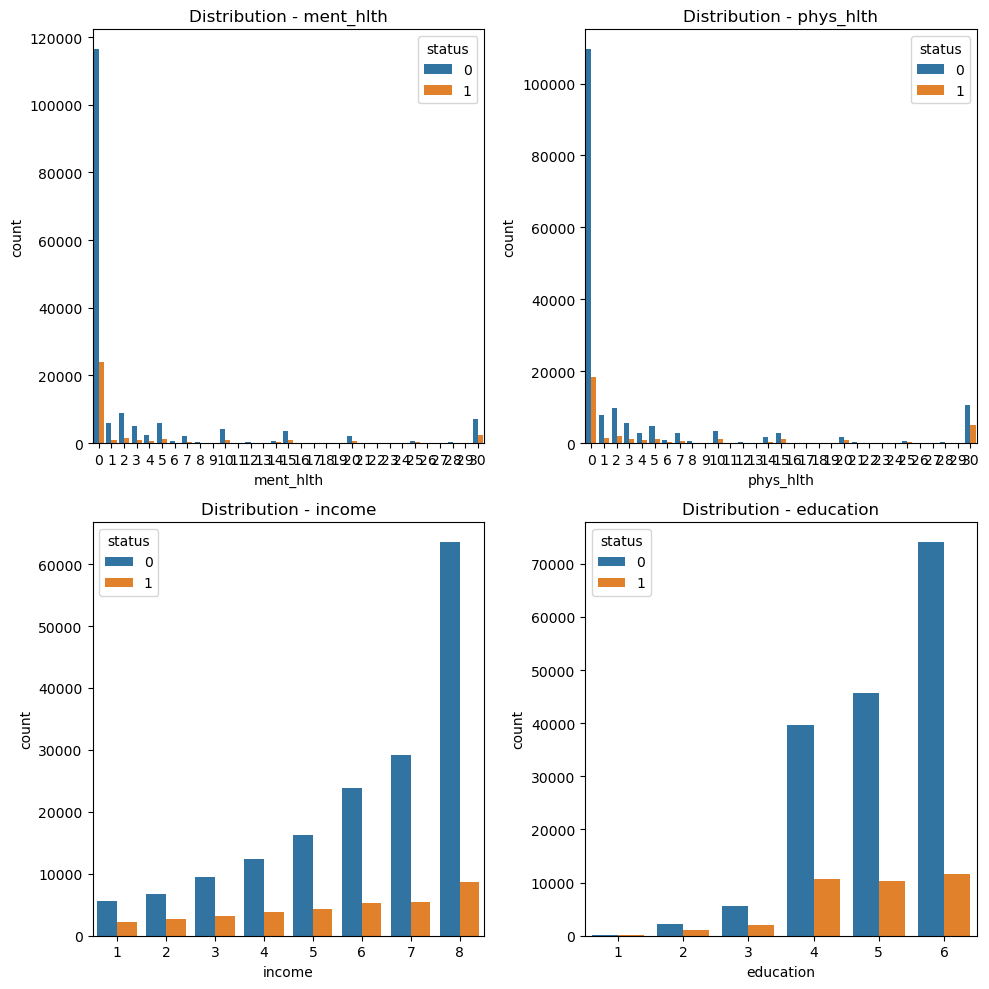

In [22]:
# Create a 2x2 grid for the subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Barplot: 
# X-axis: Discrete value
# Y-axis: Count
# Legend: 
# Create a box plot for each numeric column
for i, column in enumerate(discrete_cols):
    no_dio = df.loc[df['status'] == 0, column]
    is_dio = df.loc[df['status'] == 1, column]

    # Create the violin plots for each category
    # sns.barplot(
    #     data=[no_dio, is_dio], ax=axes[i], 
    #     palette=['lightblue', 'lightgreen'],
    # )
    sns.countplot(
        x=column, data=df, ax=axes[i], hue= df.status.astype('str'), orient = 'h'
    )

    axes[i].set_title(f'Distribution - {column}')
    axes[i].set_xlabel(column)

plt.tight_layout()
plt.show()

In [12]:
df['ment_hlth'].value_counts()

ment_hlth
0     140348
2      10450
30      9738
5       7269
1       6863
3       5882
10      5128
15      4426
4       3076
20      2651
7       2472
25       956
14       947
6        784
8        519
12       323
28       259
21       189
29       128
9         74
18        73
16        69
27        64
22        48
17        38
23        34
13        32
11        32
26        32
24        27
19        13
Name: count, dtype: int64

In [8]:
df.columns

Index(['high_bp', 'high_chol', 'chol_check', 'bmi', 'smoker', 'stroke',
       'heart_diseaseor_attack', 'phys_activity', 'fruits', 'veggies',
       'hvy_alcohol_consump', 'any_healthcare', 'no_docbc_cost', 'gen_hlth',
       'ment_hlth', 'phys_hlth', 'diff_walk', 'sex', 'age', 'education',
       'income', 'extra_med_test', 'extra_alcohol_test', 'status'],
      dtype='object')

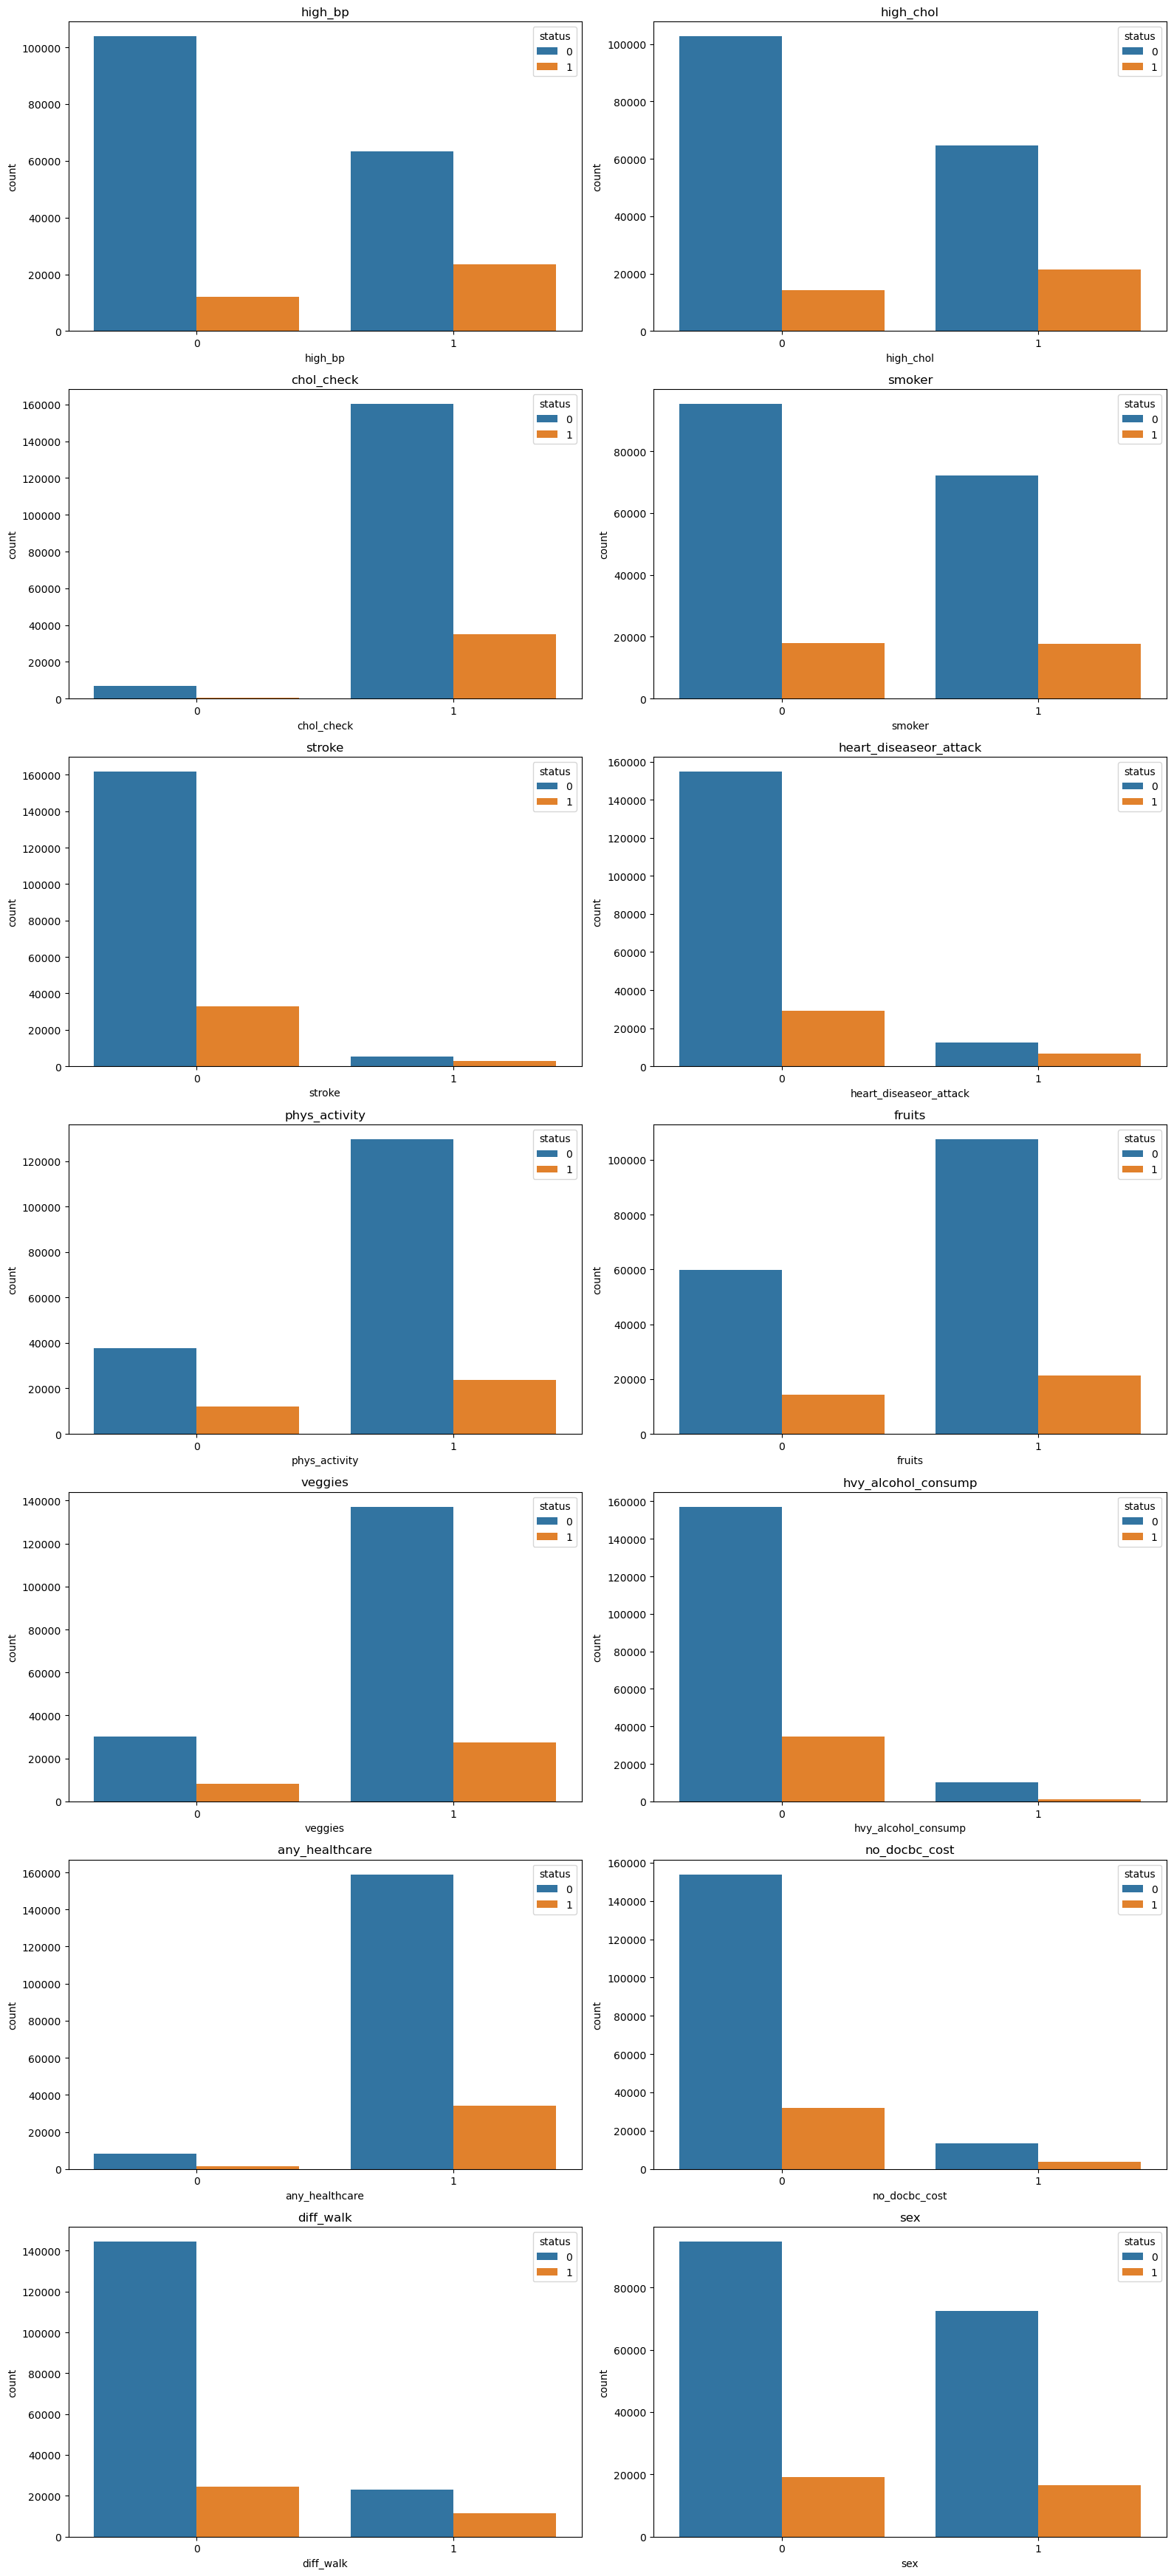

In [15]:
# # Create a bar plot
# sns.countplot(df, x="any_healthcare", hue= df.status.astype('str'))

# # Add labels and title
# plt.xlabel('Boolean Variable')
# plt.ylabel('Count')
# plt.title('Relationship between Boolean Variable and Target Variable')

# Show the plot
# plt.show()


# Create a figure and axes for the subplots
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(16, 35))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Iterate over the columns and create count plots
for i, column in enumerate(bool_cols):
    # Create a count plot for the current column
    sns.countplot(x=column, data=df, ax=axes[i], hue= df.status.astype('str'))
    
    # Set the title and rotate x-axis labels if needed
    axes[i].set_title(column)
    axes[i].tick_params(axis='x')

    
# Adjust the spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()

Check for collinearity or multicollinearity among the features. Collinearity occurs when two or more features are highly correlated with each other. High collinearity can lead to unstable model estimates and difficulties in interpretation

All continous and discrete features are independent from each others, so we can do nothing here

In [23]:
# Standardize min-max for all discrete and continuous 
from sklearn.preprocessing import StandardScaler

# Create an instance of StandardScaler
scaler = StandardScaler()

# Fit the scaler to the continuous feature data and compute the mean and standard deviation
scaler.fit(df[discrete_cols+cont_cols])

# Apply standardization to the continuous feature data
scaled_continuous_data = scaler.transform(df[discrete_cols+cont_cols])

In [69]:
scaled_df = pd.DataFrame(scaled_continuous_data, columns=discrete_cols+cont_cols)
nominal_df = df.drop(discrete_cols+cont_cols, axis=1).drop('status', axis=1)

X = pd.concat([scaled_df, nominal_df], axis=1)
y = df['status']

In [70]:
X.head()

,ment_hlth,phys_hlth,bmi,age,extra_med_test,extra_alcohol_test,high_bp,high_chol,chol_check,smoker,stroke,heart_diseaseor_attack,phys_activity,fruits,veggies,hvy_alcohol_consump,any_healthcare,no_docbc_cost,gen_hlth,diff_walk,sex
0,-0.430439,-0.487196,-0.662333,-0.012272,0.887031,0.099570,0,0,1,1,0,0,1,0,1,0,1,0,2,0,0
1,-0.295800,-0.487196,-0.057438,-1.978479,0.097491,-0.743346,0,0,1,0,0,0,1,1,1,0,1,0,1,0,0
2,3.608753,2.946617,1.152351,-1.650778,-0.507824,0.099570,0,0,1,1,0,0,1,1,0,0,1,1,3,1,0
3,-0.430439,-0.487196,1.001127,-0.012272,-0.994707,-2.376494,0,1,1,0,0,0,1,1,1,0,1,0,3,0,0
4,-0.430439,-0.487196,-0.208662,0.315429,-0.665732,0.099570,0,1,1,0,0,0,1,0,1,0,1,0,3,0,0


In [71]:
# POC logisitc regression
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X, y)

LogisticRegression()

In [72]:
model.coef_

array([[-0.01642423, -0.03516134,  0.2756191 ,  0.20435725,  1.93126781,
         1.92575613,  0.494227  ,  0.37990991,  0.47448117,  0.0028161 ,
         0.14974246,  0.22137503, -0.05206847, -0.0122113 , -0.03738627,
        -0.4325791 ,  0.04394582,  0.04800953,  0.36569519,  0.17641323,
         0.1016168 ]])

In [75]:
# Cross validation
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Declare used algos
logistic_regression = LogisticRegression()
random_forest = RandomForestClassifier()
decision_tree = DecisionTreeClassifier()

# Params
logistic_regression_params = {'C': [0.1, 1, 10]}
random_forest_params = {'n_estimators': [100, 200, 300], 'max_depth': [None, 5, 10]}
decision_tree_params = {'max_depth': [None, 5, 10], 'min_samples_split': [2, 5, 10]}

In [76]:
num_folds = 5

logistic_regression_grid = GridSearchCV(logistic_regression, logistic_regression_params, cv=num_folds, scoring='accuracy')
random_forest_grid = GridSearchCV(random_forest, random_forest_params, cv=num_folds, scoring='accuracy')
decision_tree_grid = GridSearchCV(decision_tree, decision_tree_params, cv=num_folds, scoring='accuracy')

logistic_regression_grid.fit(X_train, y_train)
random_forest_grid.fit(X_train, y_train)
decision_tree_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [77]:
print("Logistic Regression Best Parameters:", logistic_regression_grid.best_params_)
print("Logistic Regression Test Accuracy:", logistic_regression_grid.score(X_test, y_test))

print("Random Forest Best Parameters:", random_forest_grid.best_params_)
print("Random Forest Test Accuracy:", random_forest_grid.score(X_test, y_test))

print("Decision Tree Best Parameters:", decision_tree_grid.best_params_)
print("Decision Tree Test Accuracy:", decision_tree_grid.score(X_test, y_test))

Logistic Regression Best Parameters: {'C': 10}
Logistic Regression Test Accuracy: 0.9287738057109068
Random Forest Best Parameters: {'max_depth': None, 'n_estimators': 200}
Random Forest Test Accuracy: 0.9584862893887507
Decision Tree Best Parameters: {'max_depth': 10, 'min_samples_split': 10}
Decision Tree Test Accuracy: 0.958141368351031


In [18]:
# cannot use correlation coefficient. 
# Correlation coefficients are primarily useful for measuring linear relationships between continuous variables.
df.corr()

,high_bp,high_chol,chol_check,bmi,smoker,stroke,heart_diseaseor_attack,phys_activity,fruits,veggies,hvy_alcohol_consump,any_healthcare,no_docbc_cost,gen_hlth,ment_hlth,phys_hlth,diff_walk,sex,age,education,extra_med_test,extra_alcohol_test,status
high_bp,1.000000,0.299365,0.099149,0.212437,0.097521,0.130767,0.210420,-0.126138,-0.040434,-0.060485,-0.004830,0.038432,0.017349,0.300030,0.055909,0.161116,0.225012,0.052112,0.345418,-0.141344,0.109382,0.106930,0.216561
high_chol,0.299365,1.000000,0.086869,0.107453,0.089766,0.092360,0.181112,-0.078289,-0.043104,-0.040263,-0.012499,0.041740,0.014779,0.208858,0.061464,0.122814,0.145977,0.031261,0.272191,-0.072245,0.082775,0.081017,0.166249
chol_check,0.099149,0.086869,1.000000,0.036493,-0.008752,0.024757,0.043944,0.001635,0.023891,0.004685,-0.023781,0.116033,-0.054682,0.047898,-0.007303,0.032633,0.042166,-0.022289,0.088985,0.000021,0.026133,0.028676,0.052846
bmi,0.212437,0.107453,0.036493,1.000000,0.014179,0.020456,0.052433,-0.146566,-0.087425,-0.061496,-0.048166,-0.019654,0.059336,0.238772,0.086417,0.121217,0.197300,0.042893,-0.036370,-0.104956,0.091453,0.090469,0.178972
smoker,0.097521,0.089766,-0.008752,0.014179,1.000000,0.060697,0.115497,-0.087662,-0.079299,-0.030028,0.099330,-0.022459,0.049933,0.163680,0.092228,0.116765,0.122785,0.093315,0.121224,-0.161928,0.025967,0.026773,0.051720
stroke,0.130767,0.092360,0.024757,0.020456,0.060697,1.000000,0.206964,-0.069644,-0.013117,-0.041738,-0.017495,0.010163,0.034185,0.178911,0.071272,0.150752,0.176536,0.001636,0.128708,-0.076471,0.045766,0.044462,0.086420
heart_diseaseor_attack,0.210420,0.181112,0.043944,0.052433,0.115497,0.206964,1.000000,-0.086080,-0.018354,-0.038545,-0.030006,0.019326,0.030355,0.259287,0.064550,0.183378,0.213823,0.085538,0.224029,-0.099307,0.073911,0.075170,0.145864
phys_activity,-0.126138,-0.078289,0.001635,-0.146566,-0.087662,-0.069644,-0.086080,1.000000,0.144544,0.153231,0.012851,0.035998,-0.062534,-0.266231,-0.126365,-0.219586,-0.252428,0.031625,-0.092251,0.201312,-0.050622,-0.048633,-0.097015
fruits,-0.040434,-0.043104,0.023891,-0.087425,-0.079299,-0.013117,-0.018354,0.144544,1.000000,0.255755,-0.036207,0.032240,-0.042505,-0.105807,-0.067797,-0.045437,-0.049284,-0.092633,0.064154,0.112553,-0.016613,-0.014971,-0.032827
veggies,-0.060485,-0.040263,0.004685,-0.061496,-0.030028,-0.041738,-0.038545,0.153231,0.255755,1.000000,0.021370,0.029835,-0.030421,-0.123336,-0.058759,-0.065032,-0.080132,-0.064628,-0.009544,0.154267,-0.022364,-0.023118,-0.045344


In [19]:
# # Pick top 10 features 

# from sklearn.feature_selection import RFE
# from sklearn.linear_model import LogisticRegression

# # Load the dataset
# X = df.drop('status', axis=1)
# y = df['status'] #target

# # Create a logistic regression model
# model = LogisticRegression()

# # Use RFE to select the top 10 features
# rfe = RFE(model, n_features_to_select=10)
# rfe.fit(X, y)

# # Print the selected features
# print(rfe.support_)

/usr/local/Caskroom/miniconda/base/envs/myenv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/Caskroom/miniconda/base/envs/myenv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.or

[ True  True  True False False  True  True  True False False  True  True
 False  True False False  True False False False False False]


In [20]:
# X.loc[:, rfe.support_]

,high_bp,high_chol,chol_check,stroke,heart_diseaseor_attack,phys_activity,hvy_alcohol_consump,any_healthcare,gen_hlth,diff_walk
0,0,0,1,0,0,1,0,1,2,0
1,0,0,1,0,0,1,0,1,1,0
2,0,0,1,0,0,1,0,1,3,1
3,0,1,1,0,0,1,0,1,3,0
4,0,1,1,0,0,1,0,1,3,0
...,...,...,...,...,...,...,...,...,...,...
202939,0,0,1,0,0,1,0,1,3,0
202940,0,0,1,0,0,1,0,1,1,0
202941,1,1,1,0,0,1,0,1,3,0
202942,0,1,1,0,0,1,0,1,2,0


In [ ]:
# Predict
def predict()
    test_df = pd.read_csv('dtest.csv', index_col = False)
    # rename columns from camelCase to snake_case
    test_df.columns = (test_df.columns
                    .str.replace('(?<=[a-z])(?=[A-Z])', '_', regex=True)
                    .str.lower()
                 )
    test_df = test_df.loc[:, ~test_df.columns.isin(['id', 'education', 'income'])]

    # Fit the scaler to the continuous feature data and compute the mean and standard deviation
    scaler.fit(test_df[discrete_cols+cont_cols])

    # Apply standardization to the continuous feature data
    scaled_test_continuous_data = scaler.transform(test_df[discrete_cols+cont_cols])

    # Test data 
    test_scaled_df = pd.DataFrame(scaled_test_continuous_data, columns=discrete_cols+cont_cols)
    test_nominal_df = test_df.drop(discrete_cols+cont_cols, axis=1).drop('status', axis=1)

    X_test = pd.concat([test_scaled_df, test_nominal_df], axis=1)
    y_pred = model.predict(X_test)